In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(16,9))
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split , cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score,log_loss,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn import set_config
set_config(display='diagram')
from wordcloud import WordCloud
import folium
import plotly

<Figure size 1152x648 with 0 Axes>

In [2]:
df= pd.read_csv(r'C:\Users\91998\Downloads\creditcard_csv.csv')

In [3]:
df.shape

(284807, 31)

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.sample(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
121239,76122.0,1.170741,-0.996370,-0.544830,-1.044999,-0.392141,-0.067392,-0.104604,-0.195502,-1.121080,...,-0.384067,-0.817879,-0.291950,-0.729395,0.461212,1.507594,-0.123902,-0.001132,158.00,'0'
132124,79865.0,-0.827763,0.958904,2.047811,-0.089956,0.096954,-0.370717,0.998141,-0.033521,-0.560775,...,-0.128481,-0.549883,-0.126428,-0.016612,0.393138,-0.689006,0.037169,0.076953,59.99,'0'
16166,27586.0,-0.648558,-0.123256,-0.547232,-1.746359,2.581250,3.228840,0.780126,0.412818,-1.700262,...,-0.670416,-1.553803,0.081808,0.901896,-0.223904,-0.906665,-0.093318,-0.079262,129.00,'0'


In [6]:
for i in df.columns:
    k = df[i].unique()
    if len(k)<25:
        print(f" data types of {i} is {df[i].dtypes} and  unique values are {df[i].unique()}  ") 
              
        print(" ")
    else:
        print(f"  data types of {i} is {df[i].dtypes} and no of unique values are {df[i].nunique()}")
        
        print(" ")

  data types of Time is float64 and no of unique values are 124592
 
  data types of V1 is float64 and no of unique values are 275663
 
  data types of V2 is float64 and no of unique values are 275663
 
  data types of V3 is float64 and no of unique values are 275663
 
  data types of V4 is float64 and no of unique values are 275663
 
  data types of V5 is float64 and no of unique values are 275663
 
  data types of V6 is float64 and no of unique values are 275663
 
  data types of V7 is float64 and no of unique values are 275663
 
  data types of V8 is float64 and no of unique values are 275663
 
  data types of V9 is float64 and no of unique values are 275663
 
  data types of V10 is float64 and no of unique values are 275663
 
  data types of V11 is float64 and no of unique values are 275663
 
  data types of V12 is float64 and no of unique values are 275663
 
  data types of V13 is float64 and no of unique values are 275663
 
  data types of V14 is float64 and no of unique values a

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [9]:
df.duplicated().sum()

1081

In [10]:
df.isnull().sum()/len(df)*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

<AxesSubplot:>

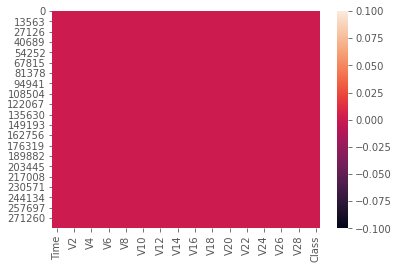

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.dtypes.value_counts()

float64    30
object      1
dtype: int64

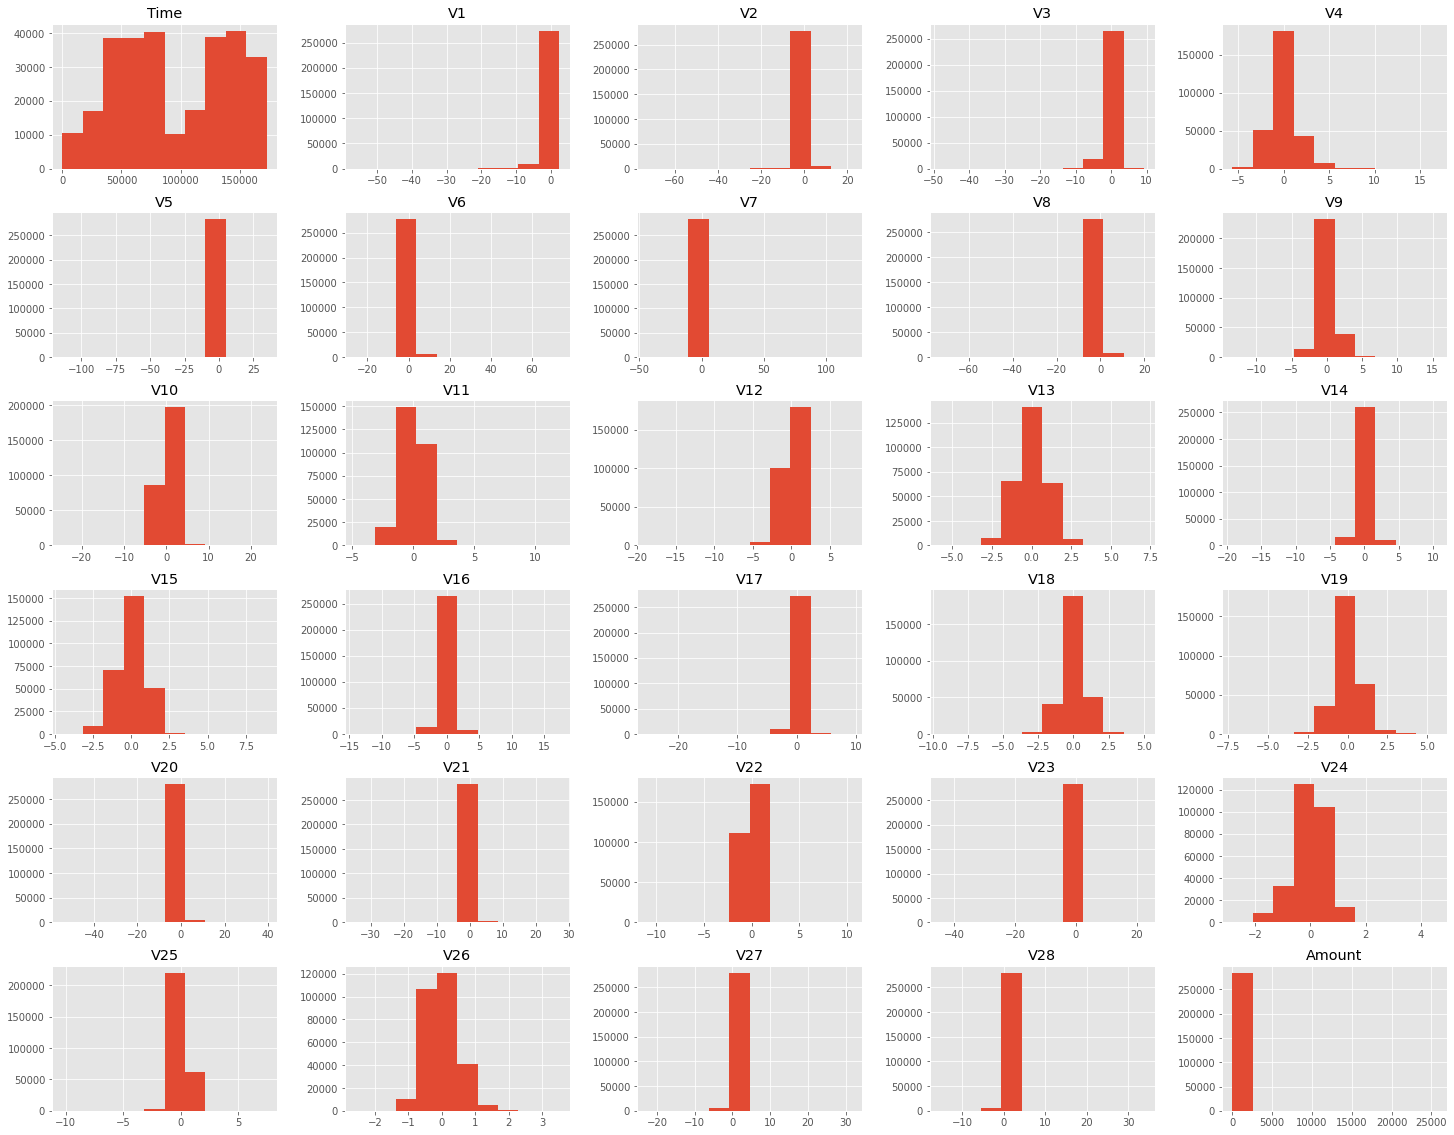

In [13]:
df.hist(figsize=(25,20));

c:\python38\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<Figure size 1152x648 with 0 Axes>

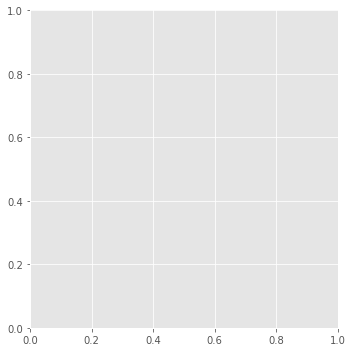

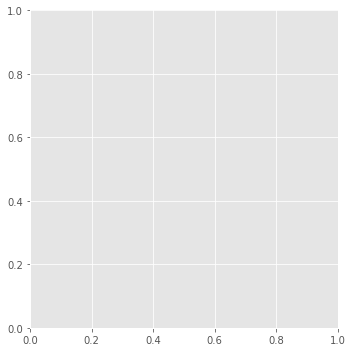

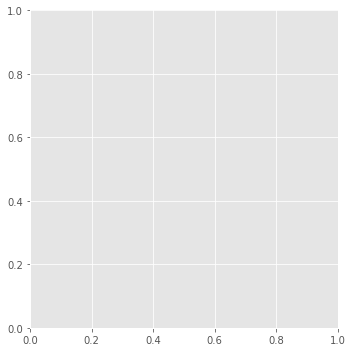

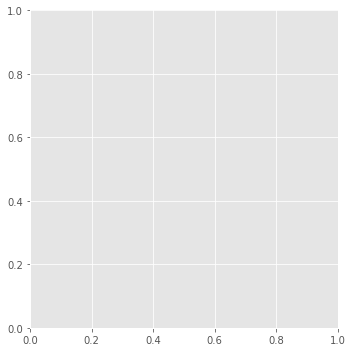

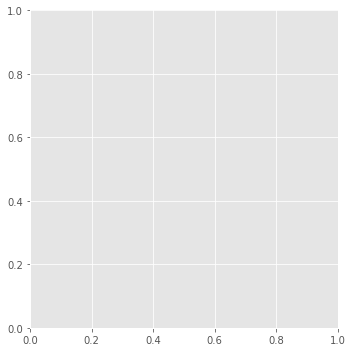

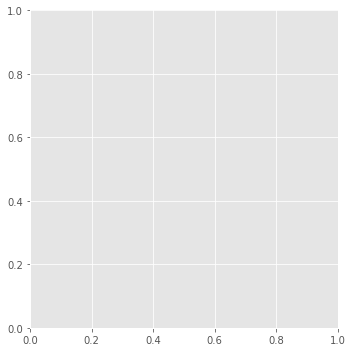

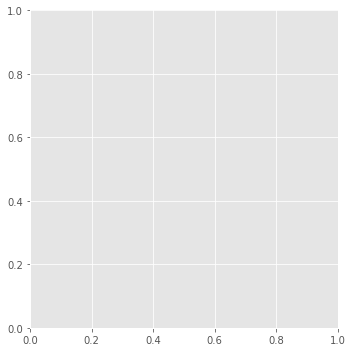

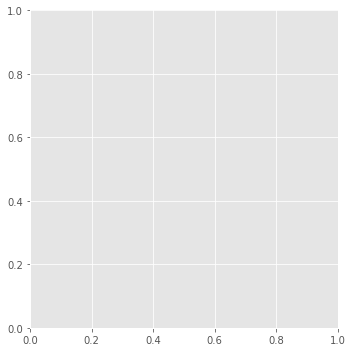

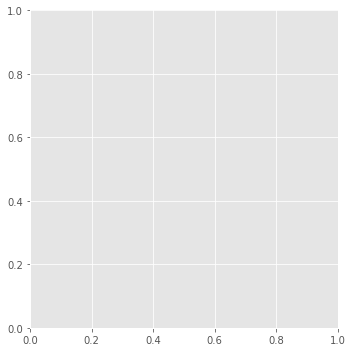

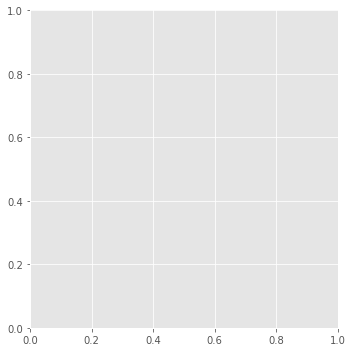

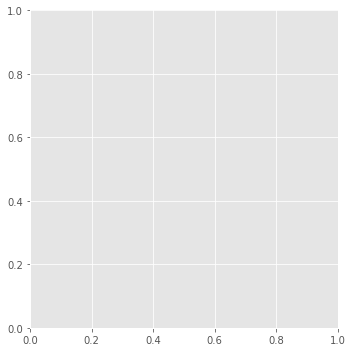

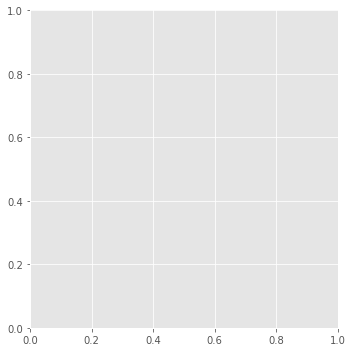

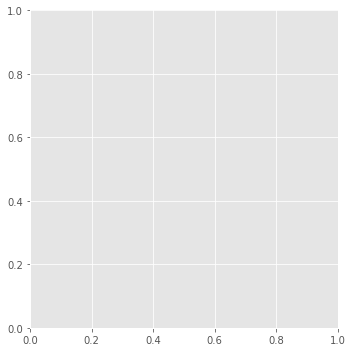

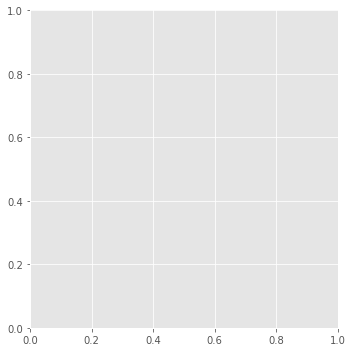

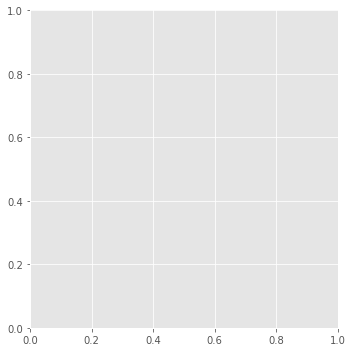

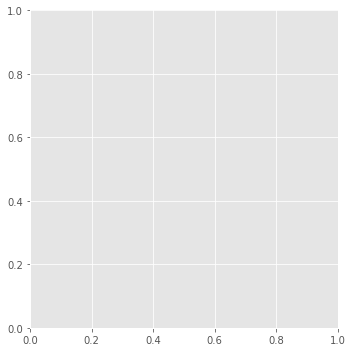

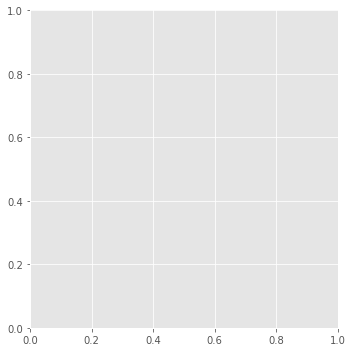

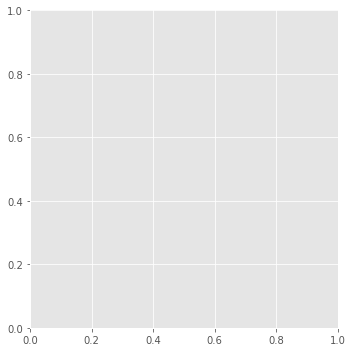

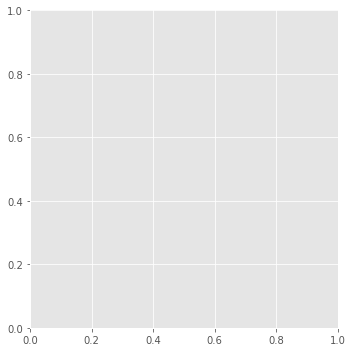

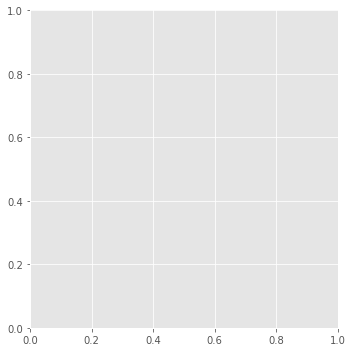

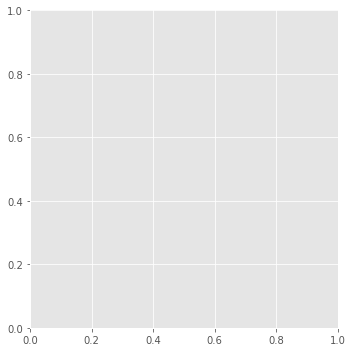

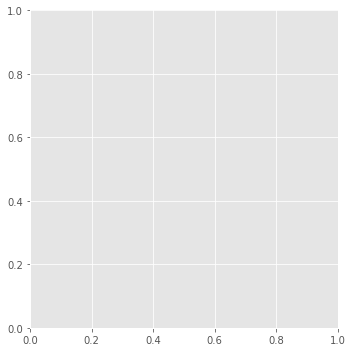

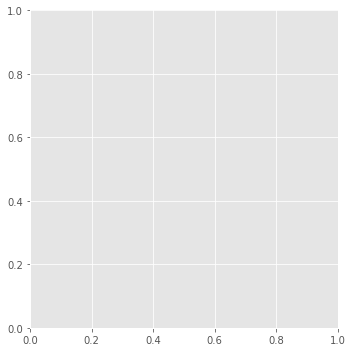

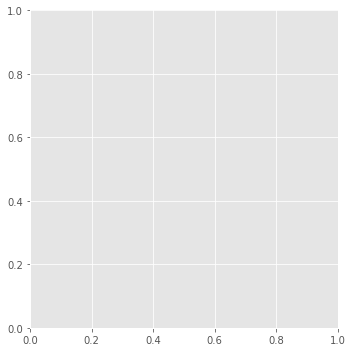

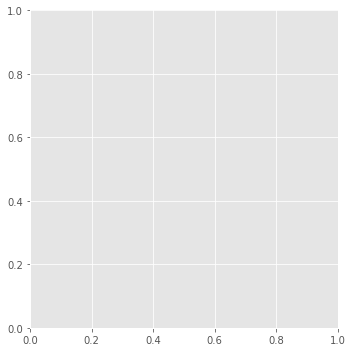

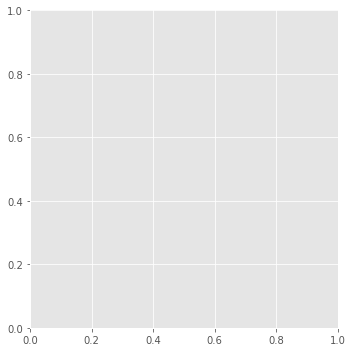

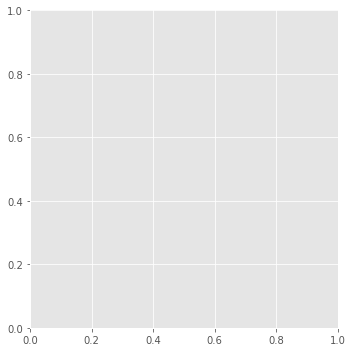

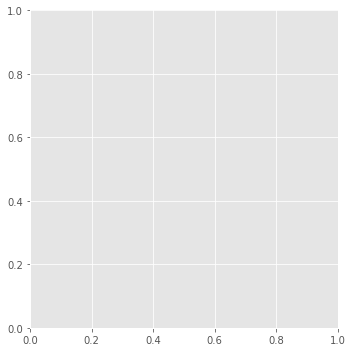

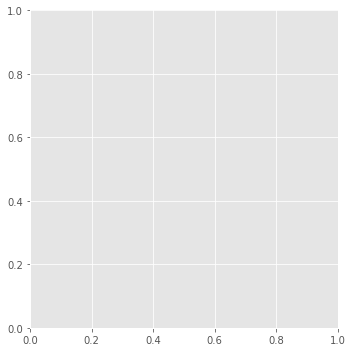

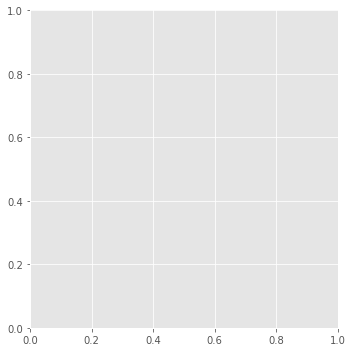

In [14]:
plt.figure(figsize=(16,9))
for i in  df.select_dtypes(exclude='object'):
    sns.displot(kde=True);

In [15]:
#class label is imbalanced
df['Class'].apply(str).value_counts()

'0'    284315
'1'       492
Name: Class, dtype: int64

In [16]:
df['Class'].dtypes

dtype('O')

In [17]:
df[df['Class']=="'0'"].shape

(284315, 31)

In [18]:
df['Class']=df['Class'].str.replace("'",'')

In [19]:
df['Class'].dtypes

dtype('O')

In [20]:
df['Class'].apply(str).value_counts()

0    284315
1       492
Name: Class, dtype: int64

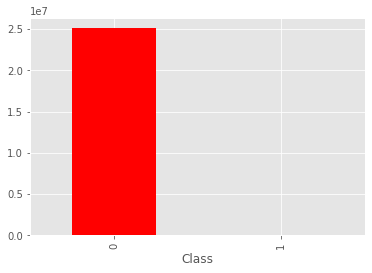

In [24]:
df.groupby('Class')['Amount'].sum().plot(kind='bar',color='red');

In [25]:
df.sample()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
83417,59840.0,-3.215382,-0.364223,-1.261883,3.794949,0.711206,-1.316476,-5.165141,0.625278,-1.582301,...,0.401341,0.152191,-0.934675,-0.256148,-0.469403,-0.282496,0.866077,-0.433466,5.91,1


In [27]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,4.654551e-16,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,2.506675e-16,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,-9.316409e-16,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.857247e-16,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.959599e-17,-2.761403e-18,0.098732
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.554057e-16,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,-1.858755e-16,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,9.379684e-16,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,2.033737e-16,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,-2.343720e-16,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246


In [28]:
df.drop(columns=['Amount','Time'] , inplace=True)

In [29]:
X=df.drop(columns=['Class'])

In [30]:
y=df['Class']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227845, 28)
(56962, 28)
(227845,)
(56962,)


In [33]:
#Without handling imbalance

In [34]:
log = LogisticRegression()

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(log, X, y, cv=10, scoring='accuracy').mean()

0.9991116792478252

In [36]:
log.fit(X_train,y_train)

LogisticRegression()

In [37]:
#Accuracy on train_data
X_train_pred = log.predict(X_train)

In [38]:
accuracy_score(X_train_pred,y_train)

0.999188044503939

In [39]:
#Accuracy on test_data

In [40]:
X_test_pred= log.predict(X_test)
#y_pred = model.predict(X_test)

In [41]:
accuracy_score(X_test_pred,y_test)

0.9992099996488887

In [42]:
# Create a Confusion Matrix
print(confusion_matrix(y_test, X_test_pred))

[[56853     8]
 [   37    64]]


In [43]:
#After handling imbalance

In [44]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [45]:
os=RandomOverSampler(0.90)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_ns)))

C:\Users\91998\AppData\Roaming\Python\Python38\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.9 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


Original dataset shape Counter({'0': 227454, '1': 391})
Resampled dataset shape Counter({'0': 227454, '1': 204708})


In [46]:
# train
log.fit(X_train_ns,y_train_ns)

LogisticRegression()

In [47]:
#accuracy on train data
X_train_ns_pred = log.predict(X_train_ns)
accuracy_score(X_train_ns_pred,y_train_ns)

0.9467074846932401

In [48]:
#accuracy on test data

In [49]:
X_test_Pred = log.predict(X_test)

In [50]:
accuracy_score(X_test_Pred,y_test)

0.9786875460833538

In [51]:
# Create a Confusion Matrix
print(confusion_matrix(y_test, X_test_Pred))

[[55654  1207]
 [    7    94]]
